## Chapter 3 - Regression Models

#### Segment 1 - Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [143]:
%matplotlib inline
rcParams['figure.figsize'] = 10,8

In [144]:
rooms = 2 * np.random.rand(100, 1)+3
rooms[1:10]

array([[3.14620613],
       [3.54861919],
       [3.79455422],
       [3.30744881],
       [3.70553805],
       [3.53967929],
       [4.76518056],
       [3.23284325],
       [4.89479543]])

In [145]:
price = 265 + 6*(np.random.rand(1,1))*rooms + abs(np.random.rand(100,1))
price[1:10]

array([[270.83122944],
       [271.92727925],
       [272.60824554],
       [271.34795428],
       [271.68857152],
       [271.67066107],
       [273.85056574],
       [271.42751506],
       [273.94558937]])

Text(0, 0.5, 'price of room ($1000USD)')

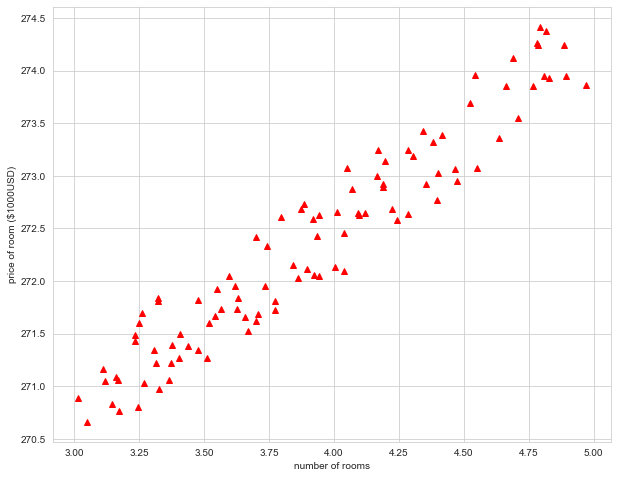

In [146]:
plt.plot(rooms,price,'r^')
plt.xlabel('number of rooms')
plt.ylabel('price of room ($1000USD)')

In [147]:
x = rooms
y = price

Linreg = LinearRegression()
Linreg.fit(x,y)
print(Linreg.intercept_, Linreg.coef_)

[265.36819083] [[1.78793954]]


Simple Algebra
* y = mx + b
* b = intercept = 265.4

Estmiated Coefficients
* LinReg.coef_ = [5.04] Estimated coefficients for the terms in the linear regression problem


In [148]:
print(Linreg.score(x,y))

0.9194112083304121


#### Segment 2 - Multiple linear regression

In [149]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4

In [150]:
import seaborn as sns
sns.set_style('whitegrid')
from collections import Counter

In [151]:
enroll = pd.read_csv('/Users/alexyang/Documents/Self-study/DS_essential_training_2/Ex_Files_Python_Data_Science_EssT_Pt2/Exercise Files/Data/enrollment_forecast.csv')
enroll[1:10]

,year,roll,unem,hgrad,inc
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112
5,6,9369,6.4,15265,2192
6,7,9920,6.5,15484,2235
7,8,10167,6.4,15723,2351
8,9,11084,6.3,16501,2411
9,10,12504,7.7,16890,2475


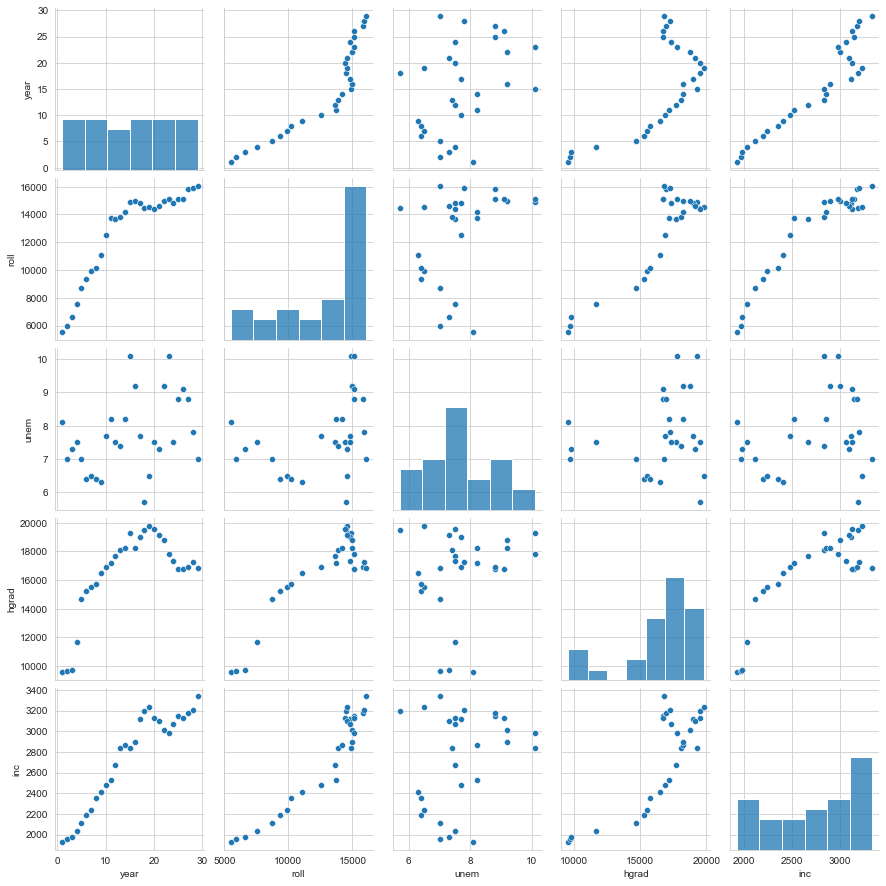

In [152]:
sns.pairplot(enroll)

In [153]:
enroll.corr()

,year,roll,unem,hgrad,inc
year,1.000000,0.900934,0.378305,0.670300,0.944287
roll,0.900934,1.000000,0.391344,0.890294,0.949876
unem,0.378305,0.391344,1.000000,0.177376,0.282310
hgrad,0.670300,0.890294,0.177376,1.000000,0.820089
inc,0.944287,0.949876,0.282310,0.820089,1.000000


In [154]:
enroll_data = enroll[['unem','hgrad']].values
enroll_target = enroll['roll'].values
enroll_data_name = ['unem','hgrad']

x, y = scale(enroll_data), enroll_target

##### Checking Missing Values

In [155]:
missing = x == np.NaN
x['missing'==True]

array([], shape=(0, 29, 2), dtype=float64)

In [156]:
Linreg = LinearRegression()

In [157]:
model = Linreg.fit(x, y)
print(model.score(x, y))

0.8488812666133723


#### Segment 3 - Logistic Regression

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
titanic = pd.read_csv('/Users/alexyang/Documents/Self-study/DS_essential_training_2/Ex_Files_Python_Data_Science_EssT_Pt2/Exercise Files/Data/titanic-training-data.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [160]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


/Users/alexyang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

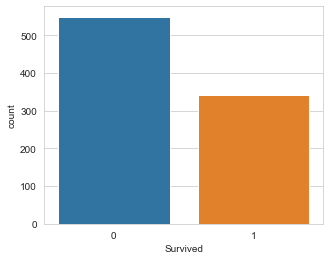

In [161]:
sns.countplot(titanic.Survived)

##### Drop Name, ticket and cabin that has no relevant to the targeted variable, survived.

In [162]:
drop_titanic = titanic.drop(columns=['Name','Ticket','Cabin'])
drop_titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


##### Treating missing value

In [163]:
drop_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [164]:
group_parch = drop_titanic.groupby('Parch').mean()
group_parch

,PassengerId,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774
1,465.110169,0.550847,2.203390,24.422000,1.084746,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


In [165]:
def assign_age(col):
    age = col[0]
    parch = col[1]

    if pd.isnull(age):
        if parch == 0:
            return 32
        elif parch == 1:
            return 24
        elif parch == 2:
            return 17
        elif parch == 3:
            return 33
        elif parch == 4:
            return 45
        elif parch == 5:
            return 39
        else:
            return 43
    else:
        return age

In [166]:
drop_titanic['Age'] = drop_titanic[['Age', 'Parch']].apply(assign_age, axis=1)
drop_titanic.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [167]:
drop_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [168]:
drop_titanic.dropna(inplace=True)
drop_titanic.reset_index(inplace=True)
drop_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        889 non-null    int64  
 1   PassengerId  889 non-null    int64  
 2   Survived     889 non-null    int64  
 3   Pclass       889 non-null    int64  
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(2)
memory usage: 69.6+ KB


##### Convert categorical data into dummy variables

In [169]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [170]:
sex_cat = drop_titanic['Sex']
sex_encoded = label_encoder.fit_transform(sex_cat)
sex_encoded[0:5]
# 1 = male, 0 = female

array([1, 0, 0, 0, 1])

In [171]:
df_sex = pd.DataFrame(sex_encoded, columns=['male_sex'])
df_sex.head()

,male_sex
0,1
1,0
2,0
3,0
4,1


In [172]:
embark_cat = drop_titanic['Embarked']
embark_encoded = label_encoder.fit_transform(embark_cat)
embark_encoded[0:10]
# 0:C, 1:Q, 2:S

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0])

In [173]:
from sklearn.preprocessing import OneHotEncoder
binary_encoder = OneHotEncoder(categories='auto')
embark_1hot = binary_encoder.fit_transform(embark_encoded.reshape(-1,1))
embark_1hot_matrix = embark_1hot.toarray()

In [174]:
df_embark = pd.DataFrame(embark_1hot_matrix, columns=['C','Q','S'])
df_embark.head()

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [175]:
ready_titanic = drop_titanic.drop(columns=['Sex','Embarked'])
ready_titanic.head()

,index,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,1,0,3,22.0,1,0,7.2500
1,1,2,1,1,38.0,1,0,71.2833
2,2,3,1,3,26.0,0,0,7.9250
3,3,4,1,1,35.0,1,0,53.1000
4,4,5,0,3,35.0,0,0,8.0500


In [176]:
ready_titanic = pd.concat([ready_titanic, df_sex, df_embark], axis=1, verify_integrity=True).astype(float)
ready_titanic.reset_index(inplace=True)
ready_titanic[0:5]

,level_0,index,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male_sex,C,Q,S
0,0,0.0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0
1,1,1.0,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0
2,2,2.0,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0
3,3,3.0,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0
4,4,4.0,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,1.0


In [177]:
ready_titanic.drop(columns=['level_0', 'index'], inplace=True)
ready_titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male_sex,C,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,1.0


##### Check for independence between features

In [178]:
ready_titanic_corr = ready_titanic.corr()
ready_titanic_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male_sex,C,Q,S
PassengerId,1.000000,-0.005028,-0.035330,0.026945,-0.057686,-0.001657,0.012703,0.043136,-0.001208,-0.033694,0.022269
Survived,-0.005028,1.000000,-0.335549,-0.072126,-0.034040,0.083151,0.255290,-0.541585,0.169966,0.004536,-0.151777
Pclass,-0.035330,-0.335549,1.000000,-0.328299,0.081656,0.016824,-0.548193,0.127741,-0.245733,0.220558,0.076466
Age,0.026945,-0.072126,-0.328299,1.000000,-0.295432,-0.220454,0.076341,0.103011,0.034083,0.012844,-0.037949
SibSp,-0.057686,-0.034040,0.081656,-0.295432,1.000000,0.414542,0.160887,-0.116348,-0.060074,-0.026692,0.069438
Parch,-0.001657,0.083151,0.016824,-0.220454,0.414542,1.000000,0.217532,-0.247508,-0.011588,-0.081585,0.061512
Fare,0.012703,0.255290,-0.548193,0.076341,0.160887,0.217532,1.000000,-0.179958,0.270731,-0.116684,-0.163758
male_sex,0.043136,-0.541585,0.127741,0.103011,-0.116348,-0.247508,-0.179958,1.000000,-0.084520,-0.075217,0.121405
C,-0.001208,0.169966,-0.245733,0.034083,-0.060074,-0.011588,0.270731,-0.084520,1.000000,-0.148646,-0.782613
Q,-0.033694,0.004536,0.220558,0.012844,-0.026692,-0.081585,-0.116684,-0.075217,-0.148646,1.000000,-0.499261


<AxesSubplot:>

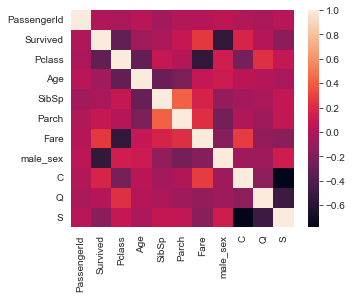

In [179]:
sns.heatmap(ready_titanic_corr)

##### The assumption of logistic regression is that variables are independent with each other, so here we are dropping those close to 1 or -1.

In [180]:
ready_titanic.drop(columns=['Fare','Pclass'], inplace=True)
ready_titanic.head()

,PassengerId,Survived,Age,SibSp,Parch,male_sex,C,Q,S
0,1.0,0.0,22.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,38.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3.0,1.0,26.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5.0,0.0,35.0,0.0,0.0,1.0,0.0,0.0,1.0


##### Checking that the dateset size is sufficient - As Rule of Thumb suggest that we should have at least 50 records per predictive feature

In [181]:
# we have 6 columns here (C,Q,S counted as one since we broke it up and survived is out dependent variable)
# So we will need 6*50 = 300 records of data
ready_titanic.count()

PassengerId    889
Survived       889
Age            889
SibSp          889
Parch          889
male_sex       889
C              889
Q              889
S              889
dtype: int64

In [182]:
x = ready_titanic.drop('Survived', axis=1)
y = ready_titanic['Survived']

In [183]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

In [184]:
print(X_train.shape)
print(y_train.shape)

(711, 8)
(711,)


In [185]:
X_train.head()

,PassengerId,Age,SibSp,Parch,male_sex,C,Q,S
605,607.0,30.0,0.0,0.0,1.0,0.0,0.0,1.0
768,770.0,32.0,0.0,0.0,1.0,0.0,0.0,1.0
29,30.0,32.0,0.0,0.0,1.0,0.0,0.0,1.0
49,50.0,18.0,1.0,0.0,0.0,0.0,0.0,1.0
105,107.0,21.0,0.0,0.0,0.0,0.0,0.0,1.0


In [186]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [187]:
y_pred = LogReg.predict(X_test)

In [192]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.85      0.84       110
         1.0       0.75      0.69      0.72        68

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.78       178
weighted avg       0.79      0.79      0.79       178



##### CV

In [196]:
from sklearn.model_selection import cross_val_predict, cross_val_score
y_train_pred = cross_val_predict(LogReg, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[379,  60],
       [ 90, 182]])

In [199]:
print(precision_score(y_train, y_train_pred))
print(accuracy_score(y_train, y_train_pred))

0.7520661157024794
0.7890295358649789


In [202]:
ready_titanic[444:445]

,PassengerId,Survived,Age,SibSp,Parch,male_sex,C,Q,S
444,446.0,1.0,4.0,0.0,2.0,1.0,0.0,0.0,1.0


In [215]:
test_passenger = np.array([838, 4, 1, 3, 1, 0, 0, 1]).reshape(1,-1)
print(LogReg.predict(test_passenger))
print(LogReg.predict_proba(test_passenger))

[0.]
[[0.81988197 0.18011803]]


/Users/alexyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/alexyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [211]:
test_passenger

array([[446,  10,   0,   2,   1,   0,   0,   1]])

## Clustering 

### K-means

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

In [3]:
%matplotlib inline
plt.figure(figsize=(7,4))

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

In [4]:
iris = datasets.load_iris()

X = scale(iris.data)
y = pd.DataFrame(iris.target)
variable_names = iris.feature_names
X[0:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

#### Build and Run Model

In [18]:
clustering = KMeans(n_clusters=3, random_state=6)

clustering.fit(X)

KMeans(n_clusters=3, random_state=6)

#### Plot model outputs

In [19]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
y.columns= ['Targets']

Text(0.5, 1.0, 'K-Means Classification')

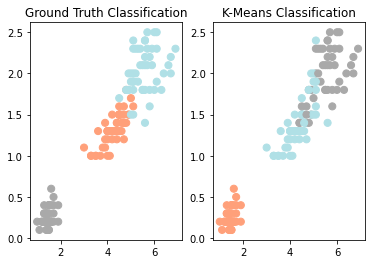

In [20]:
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

plt.subplot(1,2,1)

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c = color_theme[iris.target], s= 50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c = color_theme[clustering.labels_], s= 50)
plt.title('K-Means Classification')

Text(0.5, 1.0, 'K-Means Classification')

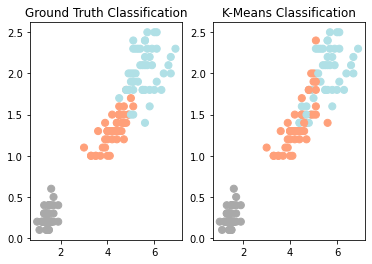

In [21]:
relabel = np.choose(clustering.labels_, [2, 0, 1]).astype(np.int64)

plt.subplot(1,2,1)

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c = color_theme[iris.target], s= 50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c = color_theme[relabel], s= 50)
plt.title('K-Means Classification')

#### Evalute clustering results

In [22]:
print(classification_report(y, relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



### Hierarchial Methods

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.metrics as sm
import seaborn as sns
from pylab import rcParams

In [25]:
from sklearn.cluster import AgglomerativeClustering
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from scipy.spatial.distance import pdist

In [26]:
np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize=(10,3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [35]:
cars = pd.read_csv('Ex_Files_Python_Data_Science_EssT_Pt2/Exercise Files/Data/mtcars.csv')
cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb']

X = cars[['mpg', 'disp', 'hp', 'wt']].values
y = cars.iloc[:,9].values

#### Use Spicy to generate dendograms

In [36]:
Z = linkage(X, 'ward')

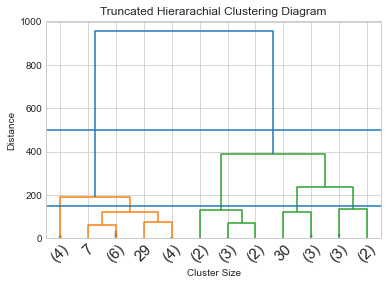

In [37]:
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15, show_contracted=True)

plt.title('Truncated Hierarachial Clustering Diagram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=500)
plt.axhline(y=150)

#### Generate Hierarchial Clusters

In [39]:
k = 2

Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.78125

In [40]:
k = 2

Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.78125

In [42]:
k = 2

Hclustering = AgglomerativeClustering(n_clusters=k, affinity='manhattan', linkage='average')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.71875

### DBSCAN (Unsupervised learning)

important DBSCAN parameter:
1. eps (max distance between two samples to be clustered in the same neighborhood; start with 0.1)
2. min_samples (min number of a samples in a neighborhood for a data point to qualify as a core point; start with small number)

In [43]:
import pandas as pd

import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter
import seaborn as sns
from pylab import rcParams

In [45]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sns.set_style('whitegrid')

#### DBSCAN clustering to identify outliers

Train Model and identify outliers

In [48]:
df = pd.read_csv('Ex_Files_Python_Data_Science_EssT_Pt2/Exercise Files/Data/iris.data.csv', header=None, sep=',')
df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species']

data = df.iloc[:,0:4].values
target = df.iloc[:,-1].values
df[:5]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [52]:
model = DBSCAN(eps=0.8, min_samples=19).fit(data) 
# max distance of 0.8 for the distance between two data points still considered in the same neighborhoood 
# each point should have a minimun of 19 data points to be considered as a core point
model

DBSCAN(eps=0.8, min_samples=19)

#### Visualize the outlier

Remember to have less than 5% of outliers in the dataset

In [56]:
outliers_df = pd.DataFrame(data)

print(Counter(model.labels_))

print(outliers_df[model.labels_ == -1])
# counter provide the numbers of data labeled to different category, outliers are with the label of -1. 
# 6 out of 150 is about 4% which is tolerable within the 5% threshold.

Counter({1: 94, 0: 50, -1: 6})
       0    1    2    3
98   5.1  2.5  3.0  1.1
105  7.6  3.0  6.6  2.1
117  7.7  3.8  6.7  2.2
118  7.7  2.6  6.9  2.3
122  7.7  2.8  6.7  2.0
131  7.9  3.8  6.4  2.0


Text(0.5, 1.0, 'DBSCAN for outlier detection')

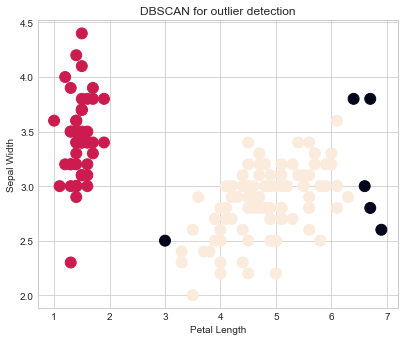

In [54]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])

colors = model.labels_

ax.scatter(data[:, 2], data[:, 1], c= colors, s=120)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')
plt.title('DBSCAN for outlier detection')

## Dimensional Reduction

### Segment 1 - Exploratory Factor Analysis

In [57]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.decomposition import FactorAnalysis
from sklearn import datasets

In [64]:
wine = datasets.load_wine()

X = wine.data
variable_names = wine.feature_names

X[0:10,]

array([[  14.23,    1.71,    2.43,   15.6 ,  127.  ,    2.8 ,    3.06,
           0.28,    2.29,    5.64,    1.04,    3.92, 1065.  ],
       [  13.2 ,    1.78,    2.14,   11.2 ,  100.  ,    2.65,    2.76,
           0.26,    1.28,    4.38,    1.05,    3.4 , 1050.  ],
       [  13.16,    2.36,    2.67,   18.6 ,  101.  ,    2.8 ,    3.24,
           0.3 ,    2.81,    5.68,    1.03,    3.17, 1185.  ],
       [  14.37,    1.95,    2.5 ,   16.8 ,  113.  ,    3.85,    3.49,
           0.24,    2.18,    7.8 ,    0.86,    3.45, 1480.  ],
       [  13.24,    2.59,    2.87,   21.  ,  118.  ,    2.8 ,    2.69,
           0.39,    1.82,    4.32,    1.04,    2.93,  735.  ],
       [  14.2 ,    1.76,    2.45,   15.2 ,  112.  ,    3.27,    3.39,
           0.34,    1.97,    6.75,    1.05,    2.85, 1450.  ],
       [  14.39,    1.87,    2.45,   14.6 ,   96.  ,    2.5 ,    2.52,
           0.3 ,    1.98,    5.25,    1.02,    3.58, 1290.  ],
       [  14.06,    2.15,    2.61,   17.6 ,  121.  ,    2.6 , 

In [65]:
factor = FactorAnalysis().fit(X)

DF = pd.DataFrame(factor.components_, columns = variable_names)
print(DF)

     alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0   0.521137   -0.213896  0.061216          -1.467149   5.611927   
1   0.015984    0.028733  0.060447           0.348732  13.051402   
2   0.115308    0.471294  0.149669           2.446553  -0.099418   
3  -0.252632   -0.286993  0.074555           1.355861  -0.018938   
4   0.189860   -0.041731  0.036548           0.009533  -0.022821   
5   0.086673    0.392423  0.012497          -0.032351   0.000223   
6  -0.070939    0.002212 -0.050282           0.075273  -0.000813   
7  -0.000000    0.000000  0.000000          -0.000000   0.000000   
8   0.000000    0.000000 -0.000000           0.000000   0.000000   
9  -0.000000    0.000000  0.000000          -0.000000  -0.000000   
10  0.000000   -0.000000  0.000000          -0.000000  -0.000000   
11  0.000000   -0.000000  0.000000           0.000000  -0.000000   
12  0.000000    0.000000 -0.000000           0.000000   0.000000   

    total_phenols  flavanoids  nonflavanoid_phe

### Segment 1 - Principal Component Analysis

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as plb
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML
import sklearn
from sklearn import datasets

In [70]:
%matplotlib inline
rcParams['figure.figsize']=5,4
sns.set_style('whitegrid')

In [71]:
from sklearn import decomposition
from sklearn.decomposition import PCA

#### PCA on wine dataset

In [72]:
wine = datasets.load_wine()
X = wine.data
variable_names = wine.feature_names

X[0:10]

array([[  14.23,    1.71,    2.43,   15.6 ,  127.  ,    2.8 ,    3.06,
           0.28,    2.29,    5.64,    1.04,    3.92, 1065.  ],
       [  13.2 ,    1.78,    2.14,   11.2 ,  100.  ,    2.65,    2.76,
           0.26,    1.28,    4.38,    1.05,    3.4 , 1050.  ],
       [  13.16,    2.36,    2.67,   18.6 ,  101.  ,    2.8 ,    3.24,
           0.3 ,    2.81,    5.68,    1.03,    3.17, 1185.  ],
       [  14.37,    1.95,    2.5 ,   16.8 ,  113.  ,    3.85,    3.49,
           0.24,    2.18,    7.8 ,    0.86,    3.45, 1480.  ],
       [  13.24,    2.59,    2.87,   21.  ,  118.  ,    2.8 ,    2.69,
           0.39,    1.82,    4.32,    1.04,    2.93,  735.  ],
       [  14.2 ,    1.76,    2.45,   15.2 ,  112.  ,    3.27,    3.39,
           0.34,    1.97,    6.75,    1.05,    2.85, 1450.  ],
       [  14.39,    1.87,    2.45,   14.6 ,   96.  ,    2.5 ,    2.52,
           0.3 ,    1.98,    5.25,    1.02,    3.58, 1290.  ],
       [  14.06,    2.15,    2.61,   17.6 ,  121.  ,    2.6 , 

In [73]:
pca = decomposition.PCA()
wine_pca = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.9981, 0.0017, 0.0001, 0.0001, 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    ])

In [74]:
pca.explained_variance_ratio_.sum()

0.9999999999999999

Try to keep at least 70% of the dataset's original information

In [75]:
comps = pd.DataFrame(pca.components_, columns=variable_names)
comps

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.001659,-0.000681,0.000195,-0.004671,0.017868,0.000990,0.001567,-0.000123,0.000601,0.002327,0.000171,0.000705,0.999823
1,0.001203,0.002155,0.004594,0.026450,0.999344,0.000878,-0.000052,-0.001354,0.005004,0.015100,-0.000763,-0.003495,-0.017774
2,-0.016874,-0.122003,-0.051987,-0.938593,0.029780,0.040485,0.085443,-0.013511,0.024659,-0.291398,0.025978,0.070324,-0.004529
3,-0.141447,-0.160390,0.009773,0.330965,0.005394,0.074585,0.169087,-0.010806,0.050121,-0.878894,0.060035,0.178200,0.003113
4,0.020337,-0.612883,0.020176,0.064352,-0.006149,0.315245,0.524761,-0.029648,0.251183,0.331747,0.051524,0.260639,-0.002299
5,0.194120,0.742473,0.041753,-0.024065,-0.001924,0.278717,0.433598,-0.021953,0.241884,0.002740,-0.023776,0.288913,-0.001212
6,-0.923280,0.150110,-0.045010,-0.031527,-0.001797,0.020186,0.038869,0.004665,0.309799,0.112837,-0.030820,-0.101974,0.001076
7,-0.284821,0.064674,0.149340,-0.015154,0.003552,0.177238,0.248117,-0.006498,-0.870433,0.081287,0.002952,0.186715,-0.000010
8,-0.086601,-0.015662,-0.073650,-0.002045,0.001964,-0.255673,-0.378307,-0.036752,0.051520,0.099029,-0.033065,0.873747,0.000073
9,-0.002245,-0.018509,-0.086800,0.003554,-0.000041,0.847195,-0.520138,0.037713,0.009723,-0.023147,-0.038470,0.017017,0.000049


<AxesSubplot:>

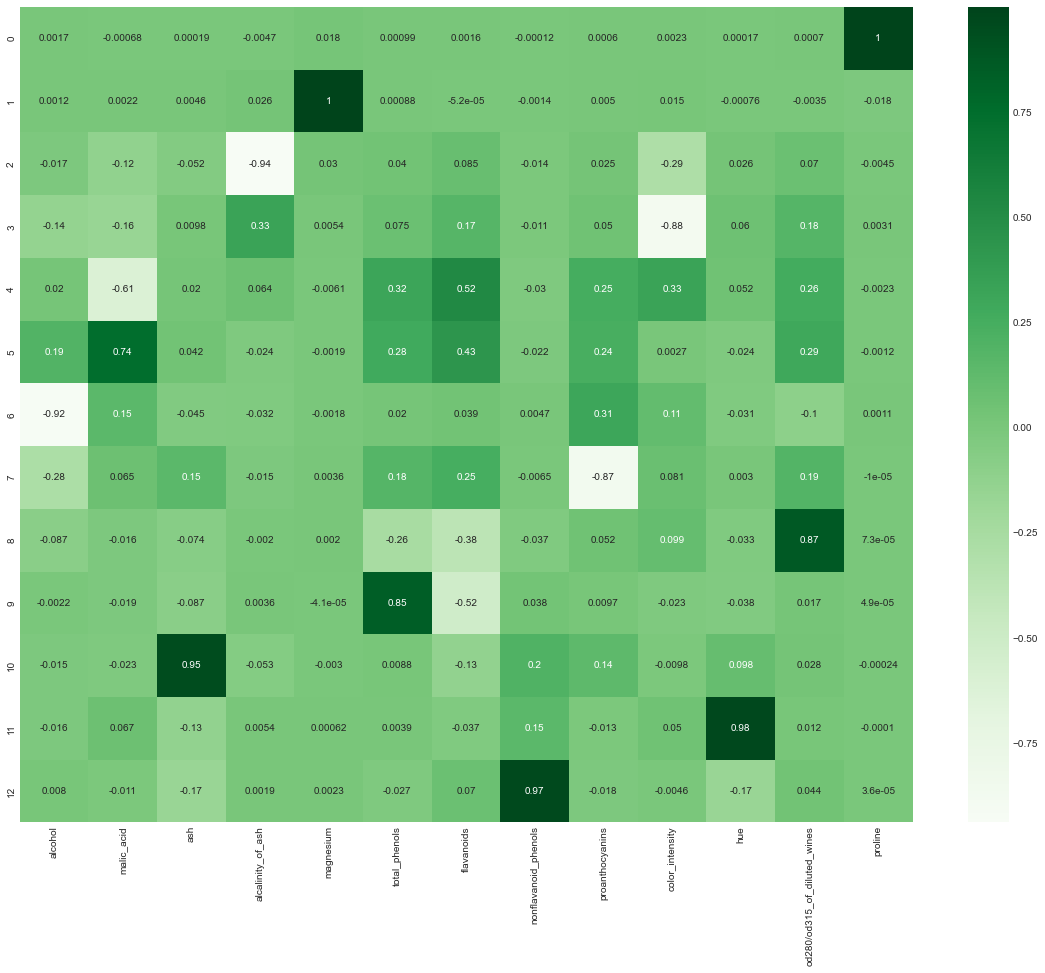

In [79]:
plt.figure(figsize=(20,15))
sns.heatmap(comps, cmap='Greens', annot=True)